 Education

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating

1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance

1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.tail(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [22]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [24]:
# business travel have no significant impact on attrition
# other 3 columns  have only 1 unique value, hence deleting
df.drop(columns=['Over18','EmployeeCount', 'StandardHours','BusinessTravel'],inplace=True)

In [25]:
profile=ProfileReport(df)

<AxesSubplot:>

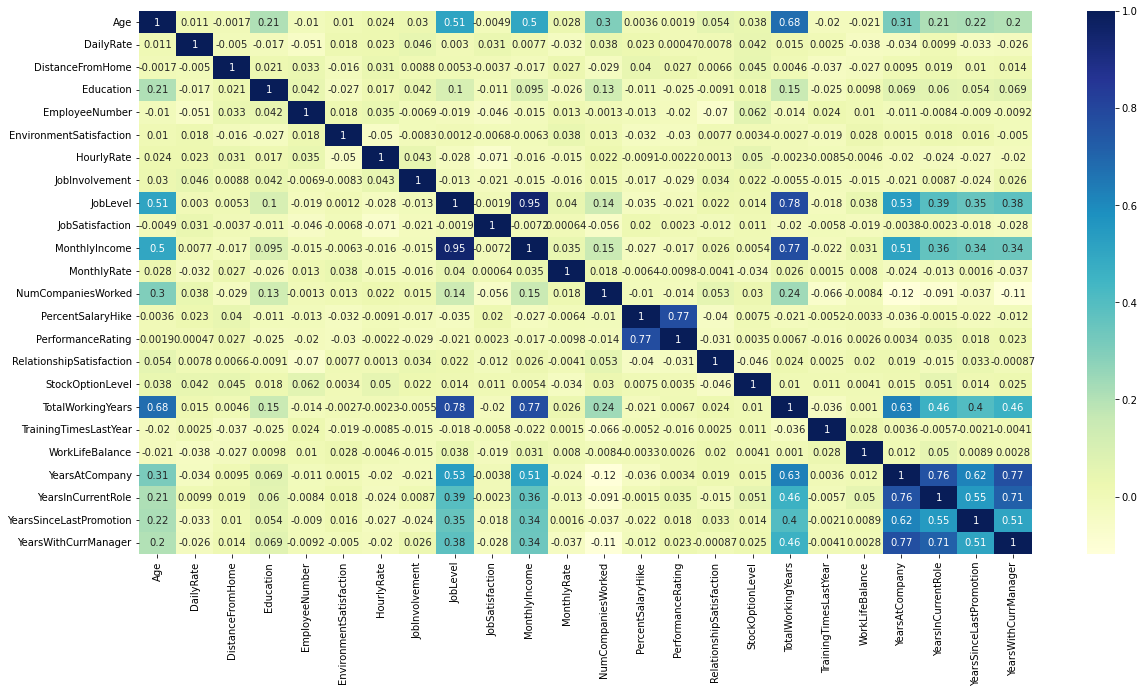

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [27]:

df.drop(columns=['TotalWorkingYears', 'YearsAtCompany' ],inplace=True)

In [28]:
df.shape

(1470, 29)

In [29]:
df.info() # to check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

<AxesSubplot:xlabel='Gender', ylabel='count'>

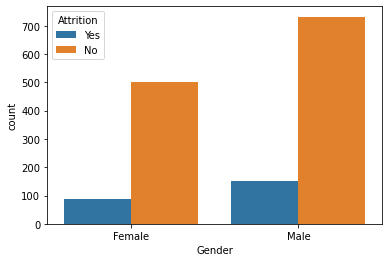

In [32]:
sns.countplot(data=df,x="Gender",hue="Attrition")

In [33]:
dfc=df.copy()

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
y=dfc.Attrition
X=dfc.drop(columns=["Attrition"])

# Categorical Variables to OHE

In [40]:
#Separate categorical and numberical columns
cat_col = list((X.dtypes[X.dtypes == object]).index)
num_col = list((X.dtypes[X.dtypes != object]).index)

In [41]:
cat_col

['Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [47]:
X = pd.get_dummies(X, drop_first=True)

In [56]:
#X.drop(columns=cat_col, inplace=True, axis=1)
X.shape

(1470, 41)

In [57]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 

# Model Building

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify = y)

In [59]:
estimator =DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=5,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X_train,y_train)
y_pred=estimator.predict(X_test)
print("Dt accuracy",accuracy_score(y_test,y_pred))

Dt accuracy 0.8299319727891157


# HyperParameter tuning with ipython

In [61]:
from IPython.display import display
from ipywidgets import interactive,IntSlider,FloatSlider,interact
import ipywidgets

In [62]:
@interact
def plot_tree(crit=["gini","entropy"],
              split=["best","random"],
              depth=IntSlider(min=2,max=20,value=2,continuous_update = False),
              min_split=IntSlider(min=1,max=5,value=2,continuous_update = False),
              leaf=IntSlider(min=1,max=5,value=1,continuous_update = False)):
    
  estimator =DecisionTreeClassifier(criterion=crit,splitter=split,max_depth=depth,min_samples_split=min_split,min_samples_leaf=leaf)
  estimator.fit(X_train,y_train)
  
  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))
  
  print("Dt accuracy on training data ",round(a,2))
  print("Dt accuracy on testing data ",round(b,2))

  if a>0.95:
    print("criterion=",crit,"\n","splitter=",split,"\n","max_depth=",depth,"\n","min_samples_split=",min_split,"\n","min_samples_leaf=",leaf)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# RandomForest

In [63]:
@interact
def plot_tree(crit=["gini","entropy"],
              depth=IntSlider(min=2,max=20,value=2,continuous_update = False),
              min_split=IntSlider(min=1,max=5,value=2,continuous_update = False),
              leaf=IntSlider(min=1,max=5,value=1,continuous_update = False),
              estimator=IntSlider(min=30,max=150,value=10,continuous_update=False)):
  estimator =RandomForestClassifier(criterion=crit,max_depth=depth,min_samples_split=min_split,min_samples_leaf=leaf,n_estimators=estimator,bootstrap=True,random_state=1)
  estimator.fit(X_train,y_train)
  
  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))
  
  print("RF accuracy on training data ",round(a,2))
  print("RF accuracy on testing data ",round(b,2))

  if a>0.95:
    print("n_estimator=",estimator,"\n","criterion=",crit,"\n","max_depth=",depth,"\n","min_samples_split=",min_split,"\n","min_samples_leaf=",leaf)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), IntSlider(value…

# Gridserchcv Optimization

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
rfc=RandomForestClassifier(random_state=1)
param_grid={"criterion":["gini","entropy"],
            "max_depth":list(range(2,7)),
            "min_samples_split":list(range(2,4)),
            
            "min_samples_leaf":[2,3],
            "n_estimators":list(range(50,250,50)),
            "bootstrap":[True,False],
            "max_features":["auto","sqrt","log2"]}

CV_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=4,n_jobs=-1)
CV_rfc.fit(X_train,y_train)

C:\Users\xende\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 150, 200]})

In [66]:
CV_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

# using Random forest with best parameters

In [67]:
estimator =RandomForestClassifier(criterion='entropy',max_depth=6,min_samples_split=2,min_samples_leaf=3,n_estimators=50,bootstrap=False,random_state=1)
estimator.fit(X_train,y_train)
y_pred=estimator.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score,roc_auc_score
confusion_matrix(y_test, y_pred)

array([[247,   0],
       [ 44,   3]], dtype=int64)

In [69]:
rf_acc=accuracy_score(y_test,y_pred)
print("accuracy for our model is =",rf_acc)
rf_rec=recall_score(y_test,y_pred,average='weighted')
print("recall_score for our model is =",rf_rec)
rf_pre=precision_score(y_test,y_pred,average='weighted')
print("precision_score for our model is =",rf_pre)
rf_f1=f1_score(y_test,y_pred,average='weighted')
print("f1_score for our model is =",rf_f1)

accuracy for our model is = 0.8503401360544217
recall_score for our model is = 0.8503401360544217
precision_score for our model is = 0.8729691189190454
f1_score for our model is = 0.7906097160053612
